In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"\YouTube_Long_vs_Shorts_Analysis.csv", encoding='latin1')

In [5]:
df.head()

,Video ID,Title,Duration,Views,Likes,Comments,Category,Duration_Seconds
0,Vb_6WMVsQ7E,"Cloud Run, App Engine, and Cloud Functions for...",PT35S,158,10,1,Shorts,35.0
1,JIXdzfVws50,How do YOU pronounce GIF?,PT30S,1485,18,13,Shorts,30.0
2,O1qCsqOG38o,Too much CSV data ?? Gemini,PT39S,2654,72,6,Shorts,39.0
3,frzE0zIKs4w,Unlock more value with Google Wallet Passes: N...,PT38M51S,1948,71,3,Long Video,2331.0
4,PupBvJqIEcY,"The key to better AI? Prioritize diversity, et...",PT48S,1405,36,3,Shorts,48.0


In [7]:
df.tail()

,Video ID,Title,Duration,Views,Likes,Comments,Category,Duration_Seconds
6459,5Eib_H_zCEY,Cluster Computing and MapReduce Lecture 3,PT44M41S,65456,223,8,Long Video,2681.0
6460,yjPBkvYh-ss,Cluster Computing and MapReduce Lecture 1,PT46M17S,229639,890,55,Long Video,2777.0
6461,#NAME?,Cluster Computing and MapReduce Lecture 2,PT52M6S,104495,320,34,Long Video,3126.0
6462,1ZDybXl212Q,Cluster Computing and MapReduce Lecture 4,PT23M31S,123962,243,38,Long Video,1411.0
6463,F59KmOrnFco,Gearing up with Zoho Offline,PT12M38S,13042,74,26,Long Video,758.0


In [9]:
df.shape

(6464, 8)

In [11]:
print(df.shape)

(6464, 8)


In [13]:
df.columns

Index(['Video ID', 'Title', 'Duration', 'Views', 'Likes', 'Comments',
       'Category', 'Duration_Seconds'],
      dtype='object')

In [15]:
df.head()

,Video ID,Title,Duration,Views,Likes,Comments,Category,Duration_Seconds
0,Vb_6WMVsQ7E,"Cloud Run, App Engine, and Cloud Functions for...",PT35S,158,10,1,Shorts,35.0
1,JIXdzfVws50,How do YOU pronounce GIF?,PT30S,1485,18,13,Shorts,30.0
2,O1qCsqOG38o,Too much CSV data ?? Gemini,PT39S,2654,72,6,Shorts,39.0
3,frzE0zIKs4w,Unlock more value with Google Wallet Passes: N...,PT38M51S,1948,71,3,Long Video,2331.0
4,PupBvJqIEcY,"The key to better AI? Prioritize diversity, et...",PT48S,1405,36,3,Shorts,48.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464 entries, 0 to 6463
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Video ID          6464 non-null   object 
 1   Title             6464 non-null   object 
 2   Duration          6464 non-null   object 
 3   Views             6464 non-null   int64  
 4   Likes             6464 non-null   int64  
 5   Comments          6464 non-null   int64  
 6   Category          6464 non-null   object 
 7   Duration_Seconds  6463 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 404.1+ KB


In [19]:
df.describe()

,Views,Likes,Comments,Duration_Seconds
count,6.464000e+03,6464.000000,6464.000000,6463.000000
mean,4.814726e+04,276.147896,13.832766,1383.125484
std,6.312299e+05,1542.303041,52.622366,2818.336811
min,0.000000e+00,0.000000,0.000000,1.000000
25%,2.845750e+03,22.000000,1.000000,176.000000
50%,6.672500e+03,71.000000,4.000000,578.000000
75%,1.850600e+04,191.000000,11.000000,2025.000000
max,3.696911e+07,57442.000000,1831.000000,41219.000000


In [21]:
print(df.isnull().sum())

Video ID            0
Title               0
Duration            0
Views               0
Likes               0
Comments            0
Category            0
Duration_Seconds    1
dtype: int64


In [23]:
df = df.dropna()

In [25]:
print(df.dtypes)

Video ID             object
Title                object
Duration             object
Views                 int64
Likes                 int64
Comments              int64
Category             object
Duration_Seconds    float64
dtype: object


In [27]:
df = df.drop_duplicates()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

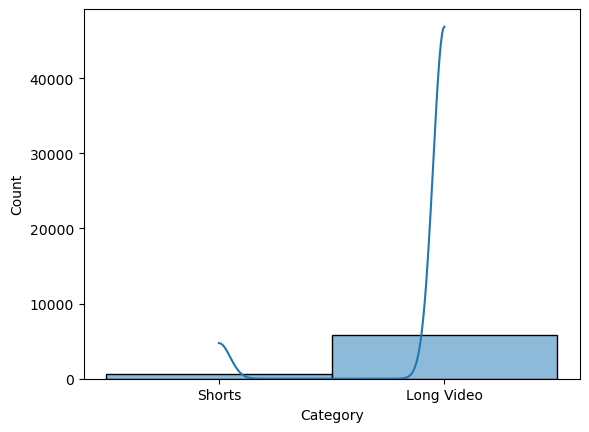

In [31]:
sns.histplot(df['Category'], kde=True)
plt.show()

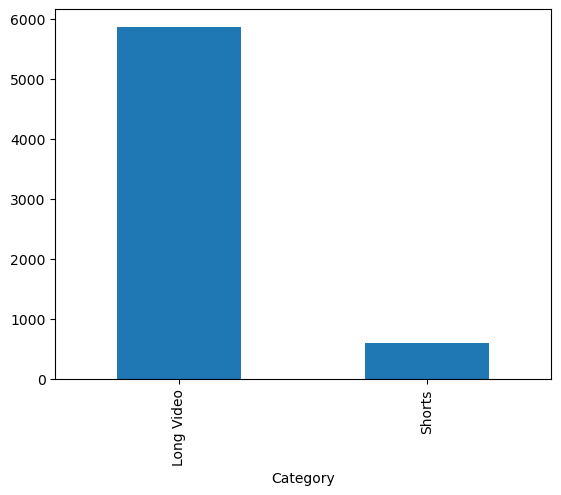

In [33]:
df['Category'].value_counts().plot(kind='bar')
plt.show()

In [35]:
correlation = df['Views'].corr(df['Duration_Seconds'])

In [37]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                     Views     Likes  Comments  Duration_Seconds
Views             1.000000  0.194824  0.185459         -0.001848
Likes             0.194824  1.000000  0.728839          0.017544
Comments          0.185459  0.728839  1.000000          0.001059
Duration_Seconds -0.001848  0.017544  0.001059          1.000000


<Axes: >

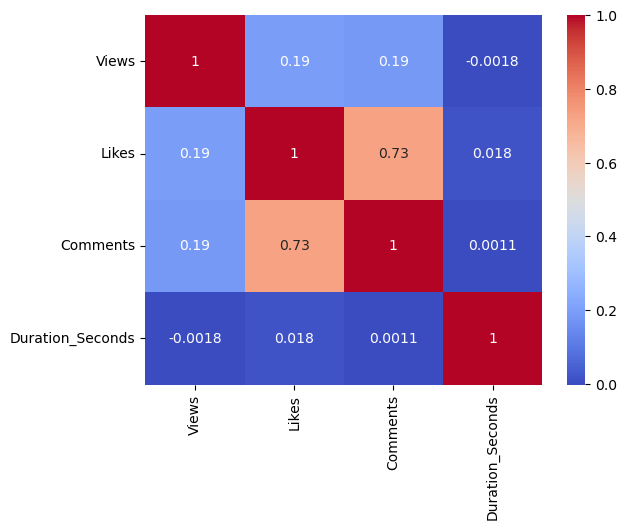

In [39]:
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')

<Axes: xlabel='Views', ylabel='Duration_Seconds'>

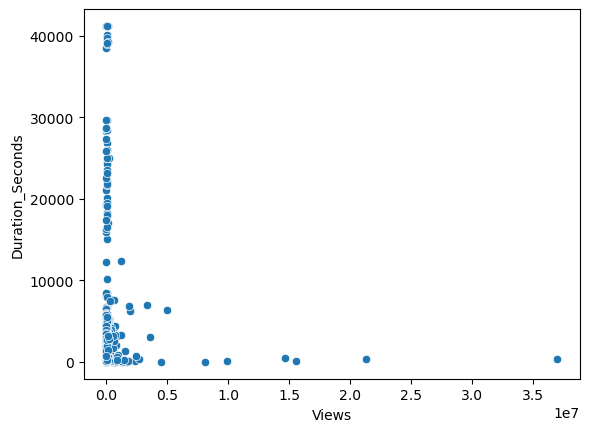

In [41]:
sns.scatterplot(data=df , x='Views' , y ='Duration_Seconds')

In [43]:
grouped_data = df.groupby('Views').mean(numeric_only = True)
print(grouped_data)

                Likes   Comments  Duration_Seconds
Views                                             
0          284.833333   5.333333      21571.833333
24           0.000000   0.000000        190.000000
25           0.000000   0.000000        224.000000
26           0.000000   0.000000        151.000000
27           0.000000   0.000000         57.000000
...               ...        ...               ...
9881564    557.000000  18.000000         56.000000
14672207  1482.000000  71.000000        513.000000
15566751   151.000000  10.000000         60.000000
21289495  1057.000000  41.000000        317.000000
36969112  1937.000000  84.000000        307.000000

[5590 rows x 3 columns]


<Axes: xlabel='Views', ylabel='Likes'>

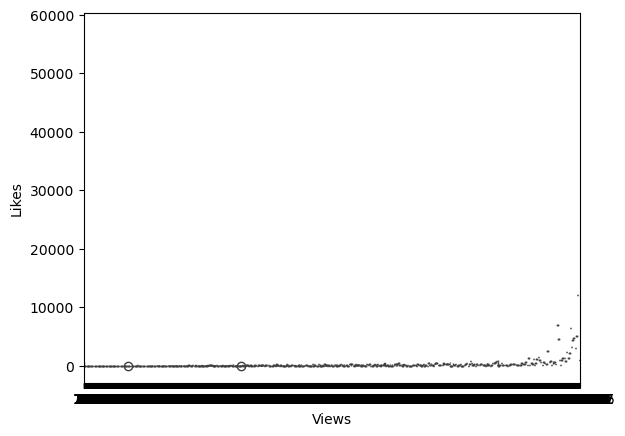

In [45]:
sns.boxplot(data = df, x = 'Views', y = 'Likes')

In [46]:
average_views = df.groupby('Video ID')['Views'].mean()
median_views = df.groupby('Video ID')['Views'].mean()

In [ ]:
print('Average Views:')
print(average_views)

: 

In [ ]:
print('Median Views')
print(median_views)

In [ ]:
# Assuming your DataFrame has a 'Video_Type' column (e.g., 'Shorts' or 'Long')
# and a 'Watch_Time' column (e.g., total watch time for each video in minutes/hours)

# Grouping by 'Video_Type' and summing the watch time
total_watch_time = df.groupby('Category')['Duration_Seconds'].sum()

# Printing the results
print(total_watch_time)

# Identifying the video type with higher total watch time
if total_watch_time['Shorts'] > total_watch_time['Long Video']:
    print("Shorts contribute more to total watch time.")
else:
    print("Long videos contribute more to total watch time.")


In [ ]:
import matplotlib.pyplot as plt

# Bar plot for total watch time comparison
total_watch_time.plot(kind='bar', color=['blue', 'orange'], legend=False)
plt.title('Total Watch Time: Shorts vs. Long Videos')
plt.xlabel('Video Type')
plt.ylabel('Total Watch Time')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df['Engagement_Percentage'] = (df['Duration_Seconds']/df['Views'])*100

In [ ]:
engagement_metrics = df.groupby('Category')['Engagement_Percentage'].mean()

In [ ]:
print("Average Engagement Percentage:")
print(engagement_metrics)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Category', y='Engagement_Percentage')
plt.title("Viewer Engagement: Shorts vs. Long Videos")
plt.xlabel("Category")
plt.ylabel("Engagement Percentage")
plt.show()

In [ ]:
# Correlation between video duration and likes/comments
duration_likes_corr = df['Duration_Seconds'].corr(df['Likes'])
duration_comments_corr = df['Duration_Seconds'].corr(df['Comments'])

print(f"Correlation between Duration and Likes: {duration_likes_corr}")
print(f"Correlation between Duration and Comments: {duration_comments_corr}")

In [ ]:
# Correlation between views and likes/comments
views_likes_corr = df['Views'].corr(df['Likes'])
views_comments_corr = df['Views'].corr(df['Comments'])

print(f"Correlation between Views and Likes: {views_likes_corr}")
print(f"Correlation between Views and Comments: {views_comments_corr}")

In [ ]:
# Scatter plot: Duration vs Likes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Duration_Seconds', y='Likes')
plt.title('Video Duration vs Likes')
plt.xlabel('Duration (seconds)')
plt.ylabel('Likes')
plt.show()

# Scatter plot: Views vs Likes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Views', y='Likes')
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

In [ ]:
# Calculate average views, likes, and comments per category
engagement_metrics = df.groupby('Category')[['Views', 'Likes', 'Comments']].mean()

# Sort by views, likes, or comments for better clarity
engagement_metrics = engagement_metrics.sort_values(by='Views', ascending=False)

# Print the results
print("Average Views, Likes, and Comments per Category:")
print(engagement_metrics)

In [ ]:
# Add a new column for total watch time
df['Total_Watch_Time'] = df['Duration_Seconds'] * df['Views']

# Calculate total watch time per category
watch_time_metrics = df.groupby('Category')['Total_Watch_Time'].sum()

# Sort categories by total watch time
watch_time_metrics = watch_time_metrics.sort_values(ascending=False)

# Print the results
print("\nTotal Watch Time per Category:")
print(watch_time_metrics)


In [ ]:
# Visualize engagement metrics
engagement_metrics.plot(kind='bar', figsize=(10, 6))
plt.title("Average Views, Likes, and Comments per Category")
plt.ylabel("Average Metrics")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

# Visualize total watch time
watch_time_metrics.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Total Watch Time per Category")
plt.ylabel("Total Watch Time (seconds)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Load the dataset (Ensure it's properly encoded)
df = pd.read_csv(r"C:\Users\V2IN\Desktop\youtubeanalysis\YouTube_Long_vs_Shorts_Analysis.csv", encoding='latin1')

# Calculate Engagement Rate
df['Engagement_Rate'] = (df['Likes'] + df['Comments']) / df['Views']

# Filter videos with high engagement rates (e.g., Engagement Rate > 0.5)
high_engagement_videos = df[df['Engagement_Rate'] > 0.5]

# Sort by Engagement Rate to find the top-performing videos
high_engagement_videos_sorted = high_engagement_videos.sort_values(by='Engagement_Rate', ascending=False)

# Display the results
print("Videos with High Engagement Rates:")
print(high_engagement_videos_sorted[['Video ID', 'Title', 'Views', 'Likes', 'Comments', 'Engagement_Rate']])


In [ ]:
# Visualize engagement rates for filtered videos
plt.figure(figsize=(10, 6))
plt.barh(high_engagement_videos_sorted['Title'], high_engagement_videos_sorted['Engagement_Rate'], color='skyblue')
plt.xlabel('Engagement Rate')
plt.ylabel('Video Title')
plt.title('Videos with High Engagement Rates')
plt.show()


In [ ]:
# Load the dataset (ensure proper encoding)
df = pd.read_csv(r"C:\Users\V2IN\Desktop\youtubeanalysis\YouTube_Long_vs_Shorts_Analysis.csv", encoding='latin1')

# Correlation between video duration and likes/comments
duration_likes_corr = df['Duration_Seconds'].corr(df['Likes'])
duration_comments_corr = df['Duration_Seconds'].corr(df['Comments'])

print(f"Correlation between Duration and Likes: {duration_likes_corr}")
print(f"Correlation between Duration and Comments: {duration_comments_corr}")


In [ ]:
# Correlation between views and likes/comments
views_likes_corr = df['Views'].corr(df['Likes'])
views_comments_corr = df['Views'].corr(df['Comments'])

print(f"Correlation between Views and Likes: {views_likes_corr}")
print(f"Correlation between Views and Comments: {views_comments_corr}")